In [12]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Fast feature extraction without data augmentation

In [13]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset"
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 30

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 3000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (3000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Found 3000 images belonging to 2 classes.


2023-03-20 11:17:08.252899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 291ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 23ms/step


In [14]:
from keras import models
from keras import layers
from tensorflow.keras.optimizers.legacy import RMSprop

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = RMSprop(learning_rate = 2e-5),
             loss ='binary_crossentropy',
             metrics=['acc'])

model_training = model.fit(train_features, train_labels,
                           epochs = 100,
                           batch_size=30,
                           validation_data=(validation_features, validation_labels))

Epoch 1/100


2023-03-20 11:24:30.157454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.3851 - acc: 0.8457

2023-03-20 11:24:32.337149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 3s 21ms/step - loss: 0.3851 - acc: 0.8457 - val_loss: 0.2443 - val_acc: 0.9280
Epoch 2/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2313 - acc: 0.9183 - val_loss: 0.2092 - val_acc: 0.9050
Epoch 3/100
100/100 [==============================] - 1s 12ms/step - loss: 0.1887 - acc: 0.9327 - val_loss: 0.1647 - val_acc: 0.9410
Epoch 4/100
100/100 [==============================] - 1s 12ms/step - loss: 0.1713 - acc: 0.9380 - val_loss: 0.1715 - val_acc: 0.9270
Epoch 5/100
100/100 [==============================] - 1s 13ms/step - loss: 0.1581 - acc: 0.9417 - val_loss: 0.1530 - val_acc: 0.9450
Epoch 6/100
100/100 [==============================] - 1s 13ms/step - loss: 0.1468 - acc: 0.9497 - val_loss: 0.1668 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 1s 13ms/step - loss: 0.1393 - acc: 0.9503 - val_loss: 0.1380 - val_acc: 0.9510
Epoch 8/100
100/100 [==============================] - 1s 13ms/step - loss

Epoch 62/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0427 - acc: 0.9867 - val_loss: 0.1313 - val_acc: 0.9480
Epoch 63/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0441 - acc: 0.9880 - val_loss: 0.1297 - val_acc: 0.9460
Epoch 64/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0432 - acc: 0.9870 - val_loss: 0.1282 - val_acc: 0.9520
Epoch 65/100
100/100 [==============================] - 1s 14ms/step - loss: 0.0419 - acc: 0.9873 - val_loss: 0.1283 - val_acc: 0.9490
Epoch 66/100
100/100 [==============================] - 1s 14ms/step - loss: 0.0421 - acc: 0.9877 - val_loss: 0.1328 - val_acc: 0.9500
Epoch 67/100
100/100 [==============================] - 1s 14ms/step - loss: 0.0418 - acc: 0.9873 - val_loss: 0.1301 - val_acc: 0.9520
Epoch 68/100
100/100 [==============================] - 1s 14ms/step - loss: 0.0405 - acc: 0.9870 - val_loss: 0.1300 - val_acc: 0.9500
Epoch 69/100
100/100 [==============================] -

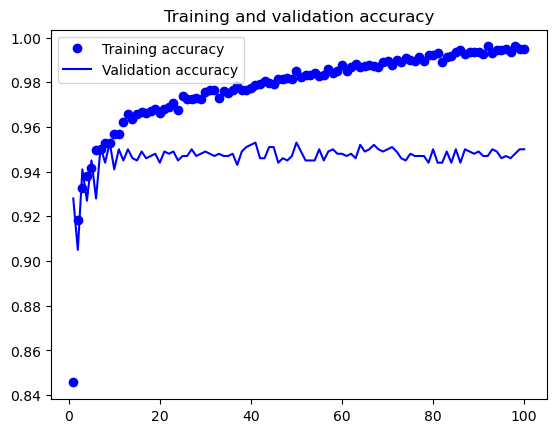

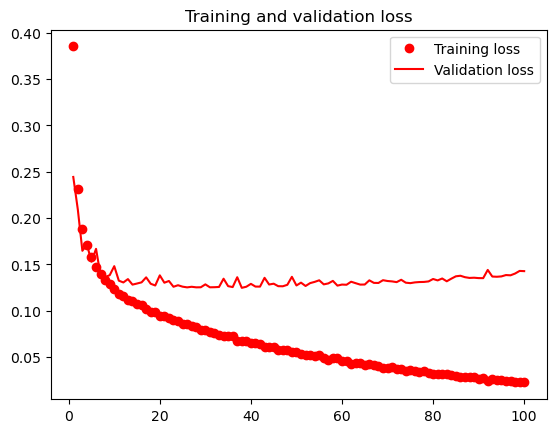

In [15]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Feature extraction (transfer learning) with augmentation

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

conv_base.trainable = False

In [17]:
#POKRENI PONOVO

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset"
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')


train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  zoom_range=0.1,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')

model.compile(optimizer = RMSprop(learning_rate = 2e-5),
             loss ='binary_crossentropy',
             metrics=['acc'])

model_training = model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs = 100,
                           validation_data=validation_generator,
                           validation_steps = 33)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


2023-03-20 11:37:17.171092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.4261 - acc: 0.8103

2023-03-20 11:37:57.664601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 54s 527ms/step - loss: 0.4261 - acc: 0.8103 - val_loss: 0.2670 - val_acc: 0.9141
Epoch 2/100
100/100 [==============================] - 65s 650ms/step - loss: 0.2727 - acc: 0.8963 - val_loss: 0.2171 - val_acc: 0.9242
Epoch 3/100
100/100 [==============================] - 68s 675ms/step - loss: 0.2306 - acc: 0.9073 - val_loss: 0.2083 - val_acc: 0.9222
Epoch 4/100
100/100 [==============================] - 68s 680ms/step - loss: 0.2191 - acc: 0.9230 - val_loss: 0.2004 - val_acc: 0.9232
Epoch 5/100
100/100 [==============================] - 69s 687ms/step - loss: 0.2059 - acc: 0.9210 - val_loss: 0.2230 - val_acc: 0.9172
Epoch 6/100
100/100 [==============================] - 69s 690ms/step - loss: 0.1901 - acc: 0.9327 - val_loss: 0.2012 - val_acc: 0.9253
Epoch 7/100
100/100 [==============================] - 67s 667ms/step - loss: 0.1864 - acc: 0.9253 - val_loss: 0.1964 - val_acc: 0.9232
Epoch 8/100
100/100 [==============================] - 62s 6

Epoch 61/100
100/100 [==============================] - 62s 623ms/step - loss: 0.1222 - acc: 0.9530 - val_loss: 0.1429 - val_acc: 0.9455
Epoch 62/100
100/100 [==============================] - 62s 615ms/step - loss: 0.1155 - acc: 0.9557 - val_loss: 0.1602 - val_acc: 0.9455
Epoch 63/100
100/100 [==============================] - 62s 618ms/step - loss: 0.1127 - acc: 0.9550 - val_loss: 0.1571 - val_acc: 0.9444
Epoch 64/100
100/100 [==============================] - 62s 619ms/step - loss: 0.1194 - acc: 0.9537 - val_loss: 0.1598 - val_acc: 0.9424
Epoch 65/100
100/100 [==============================] - 62s 620ms/step - loss: 0.1181 - acc: 0.9563 - val_loss: 0.1776 - val_acc: 0.9364
Epoch 66/100
100/100 [==============================] - 62s 617ms/step - loss: 0.1163 - acc: 0.9580 - val_loss: 0.1425 - val_acc: 0.9455
Epoch 67/100
100/100 [==============================] - 63s 628ms/step - loss: 0.1163 - acc: 0.9547 - val_loss: 0.1630 - val_acc: 0.9424
Epoch 68/100
100/100 [===================

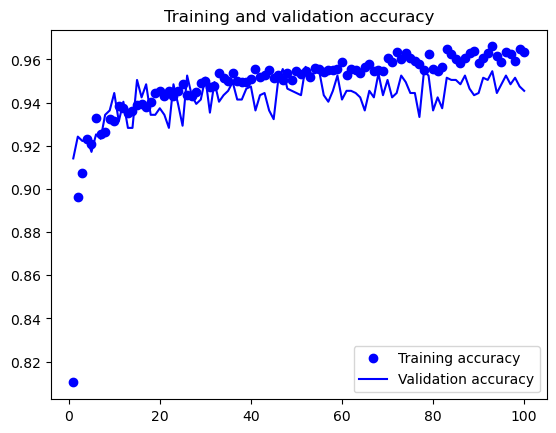

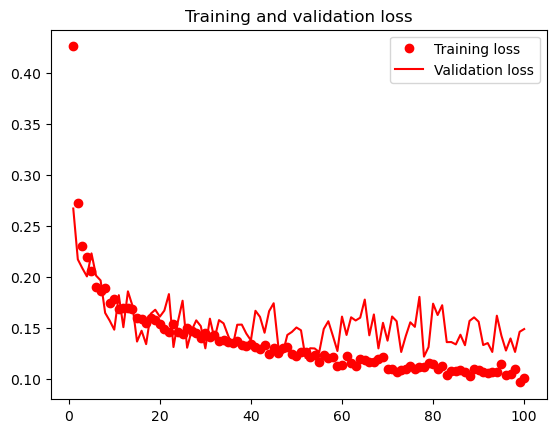

In [18]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Fine-tuning

In [19]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

from tensorflow.keras.optimizers.legacy import RMSprop
        
model.compile(optimizer = RMSprop(learning_rate = 1e-5),
             loss ='binary_crossentropy',
             metrics=['acc'])

model_training = model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs = 100,
                           validation_data=validation_generator,
                           validation_steps = 33)


Epoch 1/100


2023-03-20 13:22:57.266646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.1247 - acc: 0.9520

2023-03-20 13:23:46.887662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 63s 614ms/step - loss: 0.1247 - acc: 0.9520 - val_loss: 0.1754 - val_acc: 0.9414
Epoch 2/100
100/100 [==============================] - 63s 630ms/step - loss: 0.1142 - acc: 0.9583 - val_loss: 0.1417 - val_acc: 0.9495
Epoch 3/100
100/100 [==============================] - 65s 649ms/step - loss: 0.0933 - acc: 0.9700 - val_loss: 0.1465 - val_acc: 0.9495
Epoch 4/100
100/100 [==============================] - 65s 647ms/step - loss: 0.0949 - acc: 0.9663 - val_loss: 0.1071 - val_acc: 0.9646
Epoch 5/100
100/100 [==============================] - 64s 639ms/step - loss: 0.0949 - acc: 0.9643 - val_loss: 0.1297 - val_acc: 0.9556
Epoch 6/100
100/100 [==============================] - 64s 636ms/step - loss: 0.0895 - acc: 0.9670 - val_loss: 0.1078 - val_acc: 0.9646
Epoch 7/100
100/100 [==============================] - 64s 640ms/step - loss: 0.0881 - acc: 0.9670 - val_loss: 0.1663 - val_acc: 0.9475
Epoch 8/100
100/100 [==============================] - 64s 6

Epoch 61/100
100/100 [==============================] - 66s 658ms/step - loss: 0.0093 - acc: 0.9963 - val_loss: 0.4291 - val_acc: 0.9222
Epoch 62/100
100/100 [==============================] - 66s 658ms/step - loss: 0.0114 - acc: 0.9950 - val_loss: 0.2773 - val_acc: 0.9434
Epoch 63/100
100/100 [==============================] - 66s 659ms/step - loss: 0.0077 - acc: 0.9967 - val_loss: 0.3448 - val_acc: 0.9394
Epoch 64/100
100/100 [==============================] - 66s 658ms/step - loss: 0.0111 - acc: 0.9947 - val_loss: 0.2231 - val_acc: 0.9556
Epoch 65/100
100/100 [==============================] - 66s 660ms/step - loss: 0.0065 - acc: 0.9970 - val_loss: 0.3177 - val_acc: 0.9414
Epoch 66/100
100/100 [==============================] - 66s 655ms/step - loss: 0.0092 - acc: 0.9967 - val_loss: 0.2400 - val_acc: 0.9515
Epoch 67/100
100/100 [==============================] - 66s 660ms/step - loss: 0.0097 - acc: 0.9957 - val_loss: 0.2575 - val_acc: 0.9495
Epoch 68/100
100/100 [===================

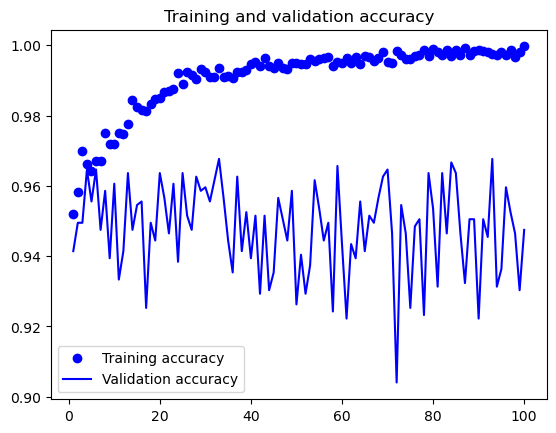

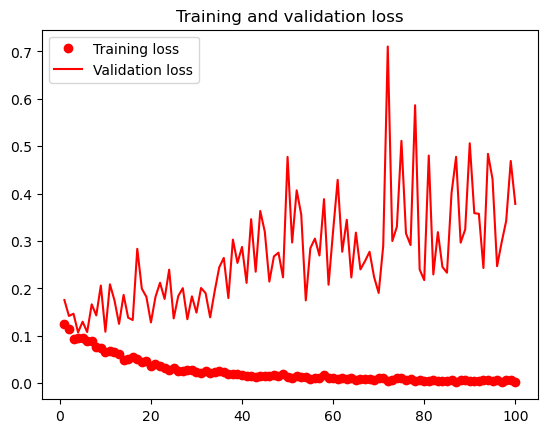

In [20]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()